## Imports

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import glob
import os
os.chdir("\data")

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust configuration of plots

#### Merge range of 12 months (05/2020 - 04/2021)

In [12]:
     
#C:\Users\hamdy\OneDrive\Dokumente\Projects\Google_Data_Analytics_Cert\Capstone\data
  
csv_dir = r"C:\Users\hamdy\OneDrive\Dokumente\Projects\Google_Data_Analytics_Cert\Capstone\data"

csv_files = glob.glob(f"{csv_dir}\*.csv")

# the follwoing line will concat all 12 csvs into one combined
#combined_csv = pd.concat([pd.read_csv(f) for f in csv_files])

# I don't want to combine them everytime, so here is just the path to the combined csv
combined_csv = pd.read_csv(r"C:\Users\hamdy\OneDrive\Dokumente\Projects\Google_Data_Analytics_Cert\Capstone\data\Combined.csv")
combined_csv.head()


C:\Users\hamdy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


## Cleaning the data

In [13]:
#combined_csv.info()
df = combined_csv.dropna(subset=['ride_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 4460150
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 476.4+ MB


## 1. How do annual members and casual riders use Cyclistic bikes differently?

possible findings:
- compare in which months there were more annual members than casuals riding bikes 
- compare the amount of riders per day on every weekday
- average duration of trip (per day/per month)


In [14]:
# cut time to daytime and date
df['started_at'].astype('string')
df['ended_at'].astype('string')
# daytime = df['started_at'].str.split(" ", n = 1, expand=True)
# end_time = df['ended_at'].str.split(" ", n = 1, expand=True)

# df['time_start'] = daytime[1]
# df['start_date'] = daytime[0]

# df['time_end'] = end_time[1]
# df['end_date'] = end_time[0]



df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [15]:
# format start_date to datetime
df['start_date'] = pd.to_datetime(df['started_at'], errors='coerce')
df['end_date'] = pd.to_datetime(df['ended_at'], errors='coerce')
# df['time_start'] = pd.to_datetime(df['time_start'], errors='coerce')
# df['time_end'] = pd.to_datetime(df['time_end'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 4460150
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_date          datetime64[ns]
 14  end_date            datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 544.5+ MB


Create new column trip duration

In [16]:
df['trip_duration']= df['end_date']-df['start_date']
df['day_of_ride'] = df['start_date'].dt.day
df['month_of_ride'] = df['start_date'].dt.month
df['year_of_ride'] = df['start_date'].dt.year

df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52,0 days 00:03:50,9,7,2020
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17,0 days 00:23:47,24,7,2020
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05,0 days 00:05:08,4,7,2020


1.1 Compare in which months there were more annual members than casuals riding bikes 

In [17]:
df['count'] = 1
#monthly_rides = df.groupby(['month_of_ride', 'member_casual']).size()
monthly_rides=df.groupby(['month_of_ride', 'member_casual']).sum().reset_index()[['month_of_ride','member_casual', 'count']]
monthly_rides

,month_of_ride,member_casual,count
0,1,casual,18117
1,1,member,78717
2,2,casual,10131
3,2,member,39491
4,3,casual,84033
5,3,member,144463
6,4,casual,136601
7,4,member,200629
8,5,casual,256916
9,5,member,274717


<function matplotlib.pyplot.show(close=None, block=None)>

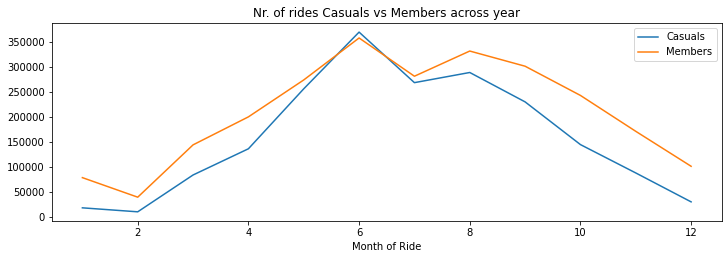

In [18]:
fig = plt.figure()

# # Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2, 2, (1,2))

monthly_rides.groupby('member_casual').plot(x='month_of_ride', y='count', ax=ax1)

# Add Title, Legend

plt.title('Nr. of rides Casuals vs Members across year') 
plt.legend(["Casuals", "Members"], loc ="upper right")
plt.xlabel('Month of Ride')

plt.show


1.1 Findings: We can see that rides from casuals exceed member rides in June. Furthermore the gap of rides between casuals and members is especially close over the summer months and is larger during winter.

1.2 Compare the amount of riders per day on every weekday

In [19]:
#make a column with weekdays
df['day_of_week'] = df['start_date'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride,count,day_of_week
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,...,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52,0 days 00:03:50,9,7,2020,1,Thursday
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,...,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17,0 days 00:23:47,24,7,2020,1,Friday
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,...,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020,1,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,...,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020,1,Friday
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,...,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05,0 days 00:05:08,4,7,2020,1,Saturday


In [20]:
weekday_rides=df.groupby(['day_of_week', 'member_casual']).sum().reset_index()[['day_of_week','member_casual', 'count']]
weekday_rides

,day_of_week,member_casual,count
0,Friday,casual,281188
1,Friday,member,375057
2,Monday,casual,209391
3,Monday,member,337504
4,Saturday,casual,439710
5,Saturday,member,376904
6,Sunday,casual,366593
7,Sunday,member,323420
8,Thursday,casual,212529
9,Thursday,member,363892


Text(0.5, 0, 'Weekday')

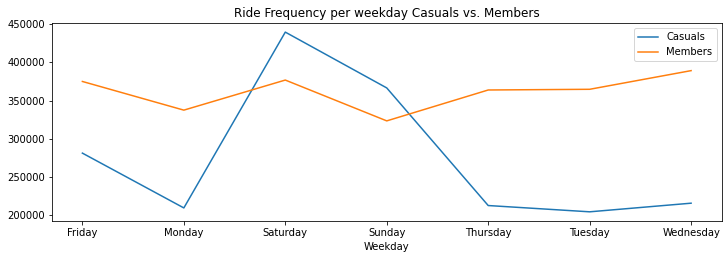

In [21]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2, 2, (1,2))

# Divide the figure into a 1x2 grid, and give me the second section
#ax2 = fig.add_subplot(223)

weekday_rides.groupby('member_casual').plot(x='day_of_week', y='count', ax=ax1, stacked=True)

# Add Title, Legend

plt.title('Ride Frequency per weekday Casuals vs. Members') 
plt.legend(["Casuals", "Members"], loc ="upper right")
plt.xlabel('Weekday')

1.2 Findings: It can be observed, that bike rides by casual riders spike are the highest on Saturday, followed by Sunday and Friday. This could possible indicate that casual riders most often take bikes on weekenddays for freetime activities, meaning they commute in a different way throughout the usual workdays in a week. The ride frquency by members is relatively stable throughout the week, with a low on Sundays. This could indicate, that the bike is a staple in their commute throughout the week.

1.3 Average duration per trip

In [22]:
duration = df.groupby('member_casual')['trip_duration'].mean()
duration

member_casual
casual   0 days 00:39:40.169177310
member   0 days 00:11:43.510122362
Name: trip_duration, dtype: timedelta64[ns]

1.3 Findings: According to the calculated numbers, throughout the whole year of data, the average duration of trips for members was roughly 12min while casuals drove for almost 40mins. This could lead to the assumotion, that members use the bikerides for trips for example to work that take too long to walk but too short to drive. Casuals drive longer, leading to an hypothesis of casuals using bikes for emergencies or as a substitute to their normal transportation.


## 2.  Why would casual riders buy Cyclistic annual memberships

In [75]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride,count,day_of_week
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,...,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52,0 days 00:03:50,9,7,2020,1,Thursday
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,...,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17,0 days 00:23:47,24,7,2020,1,Friday
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,...,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020,1,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,...,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020,1,Friday
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,...,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05,0 days 00:05:08,4,7,2020,1,Saturday


## 3. How can Cyclistic use digital media to influence casual riders to become members?

In [33]:
casual_df = df.loc[df['member_casual']=='casual']
casual_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride,count,day_of_week
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,...,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020,1,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,...,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020,1,Friday
5,65636B619E24257F,docked_bike,2020-07-28 16:33:03,2020-07-28 16:49:10,Fairbanks St & Superior St,635.0,Wells St & Concord Ln,289.0,41.895748,-87.620104,...,-87.634656,casual,2020-07-28 16:33:03,2020-07-28 16:49:10,0 days 00:16:07,28,7,2020,1,Tuesday
13,7FA38D309B160B59,docked_bike,2020-07-08 23:06:14,2020-07-08 23:12:24,Wells St & Elm St,182.0,State St & Pearson St,106.0,41.903222,-87.634324,...,-87.628722,casual,2020-07-08 23:06:14,2020-07-08 23:12:24,0 days 00:06:10,8,7,2020,1,Wednesday
16,8CE8D05B0044D078,docked_bike,2020-07-28 17:19:52,2020-07-28 17:43:41,Lake Shore Dr & Belmont Ave,334.0,Lake Shore Dr & Wellington Ave,157.0,41.940775,-87.639192,...,-87.636829,casual,2020-07-28 17:19:52,2020-07-28 17:43:41,0 days 00:23:49,28,7,2020,1,Tuesday


In [45]:
station_popularity = casual_df.groupby(['start_station_name']).count().reset_index()[['start_station_name', 'count']]
station_popularity

,start_station_name,count
0,2112 W Peterson Ave,332
1,63rd St Beach,2047
2,900 W Harrison St,1685
3,Aberdeen St & Jackson Blvd,2749
4,Aberdeen St & Monroe St,2671
...,...,...
704,Woodlawn Ave & 75th St,52
705,Woodlawn Ave & Lake Park Ave,1096
706,Yates Blvd & 75th St,212
707,Yates Blvd & 93rd St,25


In [47]:
top_ten_stations = station_popularity.sort_values(by=['count'], ascending=False).head(10)
top_ten_stations

,start_station_name,count
612,Streeter Dr & Grand Ave,45075
371,Lake Shore Dr & Monroe St,31999
454,Millennium Park,28124
448,Michigan Ave & Oak St,22228
615,Theater on the Lake,21121
372,Lake Shore Dr & North Blvd,21040
325,Indiana Ave & Roosevelt Rd,17020
546,Shedd Aquarium,16943
446,Michigan Ave & Lake St,15184
139,Clark St & Elm St,14492


Text(0.5, 0, 'Name of start station')

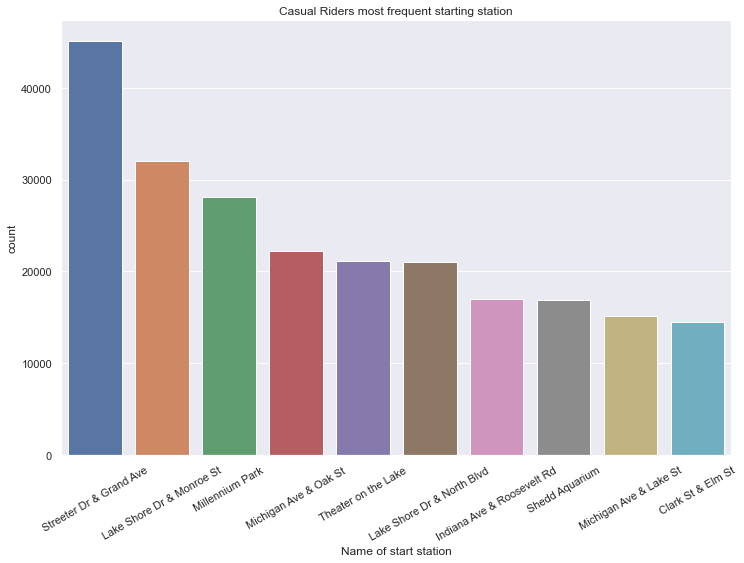

In [63]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="start_station_name", y="count", data=top_ten_stations)
ax.tick_params(axis='x', labelrotation=30)

plt.title('Casual Riders most frequent starting station') 
plt.xlabel('Name of start station')


In [ ]:
#Name months again instead of just numbers
casual_df['month_name_of_ride'] = df['start_date'].dt.month_name()

In [60]:
casuals_month_of_ride=casual_df.groupby(['month_of_ride']).sum().reset_index()[['month_of_ride', 'count']].sort_values(by=["month_of_ride"])
casuals_month_of_ride

,month_of_ride,count
0,1,18117
1,2,10131
2,3,84033
3,4,136601
4,5,256916
5,6,370681
6,7,269296
7,8,289661
8,9,230692
9,10,145012


Text(0.5, 1.0, 'Casual Members riding requency')

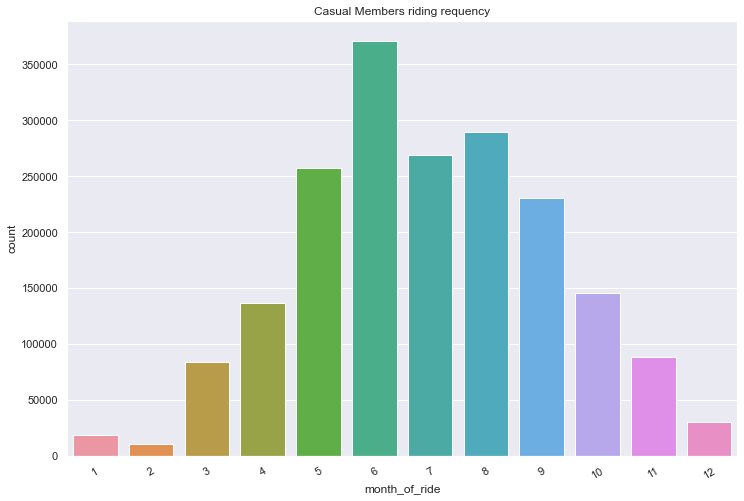

In [64]:
# Set styles
sns.set_style('darkgrid')
sns.set_palette('Set2')


ax = sns.barplot(x="month_of_ride", y="count", data=casuals_month_of_ride)
ax.tick_params(axis='x', labelrotation=30)

plt.title('Casual Members riding requency')

In [66]:
weekday_rides_casual=casual_df.groupby(['day_of_week']).sum().reset_index()[['day_of_week', 'count']]

In [68]:
top_weekday = weekday_rides_casual.sort_values(by=['count'], ascending=False)
top_weekday

,day_of_week,count
2,Saturday,439710
3,Sunday,366593
0,Friday,281188
6,Wednesday,215607
4,Thursday,212529
1,Monday,209391
5,Tuesday,204301


Text(0.5, 1.0, 'Casual Members riding requency per weekday')

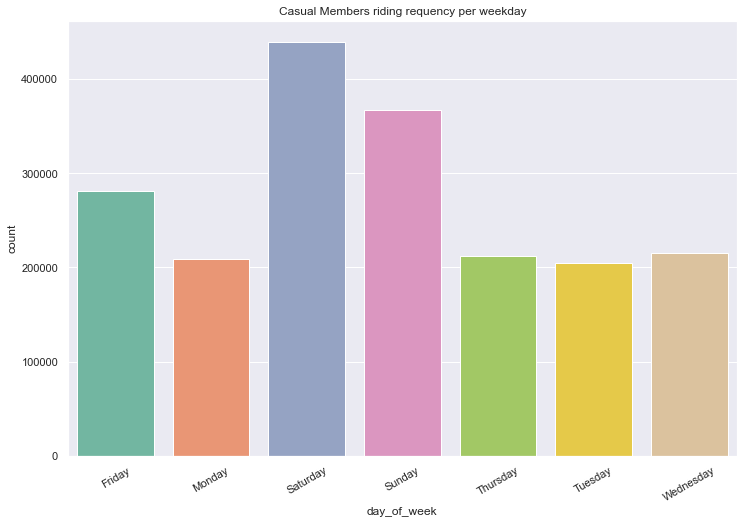

In [69]:
sns.set_style('darkgrid')
sns.set_palette('Set2')


ax = sns.barplot(x="day_of_week", y="count", data=weekday_rides_casual)
ax.tick_params(axis='x', labelrotation=30)

plt.title('Casual Members riding requency per weekday')

In [71]:
# correlation matrix just for casual members
correlation_matrix_casual = casual_df.corr()

correlation_matrix_casual

,start_lat,start_lng,end_lat,end_lng,day_of_ride,month_of_ride,year_of_ride,count
start_lat,1.000000,-0.570452,0.859805,-0.497838,-0.000142,0.011466,-0.012568,NaN
start_lng,-0.570452,1.000000,-0.497308,0.747355,-0.007504,-0.016974,-0.000866,NaN
end_lat,0.859805,-0.497308,1.000000,-0.564956,-0.000026,0.011009,-0.011829,NaN
end_lng,-0.497838,0.747355,-0.564956,1.000000,-0.008046,-0.017356,-0.000617,NaN
day_of_ride,-0.000142,-0.007504,-0.000026,-0.008046,1.000000,-0.100882,0.045017,NaN
month_of_ride,0.011466,-0.016974,0.011009,-0.017356,-0.100882,1.000000,-0.815919,NaN
year_of_ride,-0.012568,-0.000866,-0.011829,-0.000617,0.045017,-0.815919,1.000000,NaN
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_numeric_casual = casual_df
for col_name in df_numeric_casual.columns:
    if(df_numeric_casual[col_name].dtype == 'object'):
       df_numeric_casual[col_name]=  df_numeric_casual[col_name].astype('category')
       df_numeric_casual[col_name] = df_numeric_casual[col_name].cat.codes

<ipython-input-73-ab09b2bcb614>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_casual[col_name]=  df_numeric_casual[col_name].astype('category')
<ipython-input-73-ab09b2bcb614>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_casual[col_name] = df_numeric_casual[col_name].cat.codes


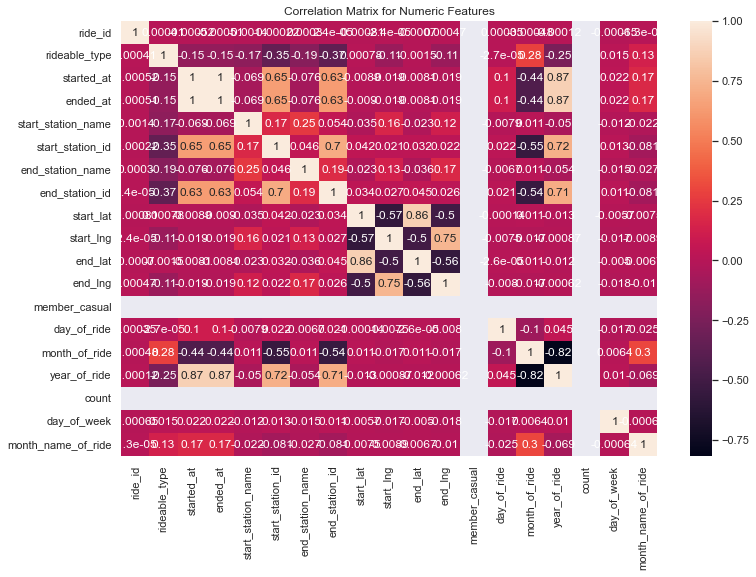

In [74]:
correlation_mat_casual = df_numeric_casual.corr()

sns.heatmap(correlation_mat_casual, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

Findings 3.): To influence people via digital advertisments, it is very important to analyze and gather information about the given target groups. Although there is no personal information about the riders personal characteristics, there were several hints in the location and time of usage of the service through causal members. Most casual drivers are using the bike sharing service in the summer months, and more specfically on weekends. Throughout the months of May till August there are more than 250000 bike rides of casual members each of those months, withg the peak being June ith over 350.000 bike rides.  Thus it makes sense to primarly push digital ads from spring on and continue throughout summer months, to reach a maximum amount of actively engaged casual members. In order to locally narrow the digital ads, it would be useful to look at the most used stations by casual members and send out ads specifically targeting the areas around the e.g. top ten stations.